In [31]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pyproj

In [16]:
conn = sqlite3.connect('data/kontur_population.gpkg')

In [17]:
cursor = conn.cursor()

In [18]:
cursor.execute('SELECT name FROM sqlite_master WHERE type="table";')

tables = cursor.fetchall()

In [19]:
for table in tables:
    print(table[0])

gpkg_spatial_ref_sys
gpkg_contents
gpkg_ogr_contents
gpkg_geometry_columns
gpkg_tile_matrix_set
gpkg_tile_matrix
sql_statement
sqlite_sequence


In [20]:
table_dict = {}

for table in tables:
    query = f"SELECT * FROM {table[0]} LIMIT 10;"

    table_dict[table[0]] = pd.read_sql_query(query, conn)

    print(f"Table: {table[0]}\n{table_dict[table[0]]}\n\n")

Table: gpkg_spatial_ref_sys
                   srs_name  srs_id organization  organization_coordsys_id  \
0   Undefined cartesian SRS      -1         NONE                        -1   
1  Undefined geographic SRS       0         NONE                         0   
2  WGS 84 / Pseudo-Mercator    3857         EPSG                      3857   
3           WGS 84 geodetic    4326         EPSG                      4326   

                                          definition  \
0                                          undefined   
1                                          undefined   
2  PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS ...   
3  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS...   

                                         description  
0    undefined cartesian coordinate reference system  
1   undefined geographic coordinate reference system  
2                                               None  
3  longitude/latitude coordinates in decimal degr...  


Table: gpkg_contents
  

In [28]:
# Define the path to your GeoPackage file and the layer name
gpkg_filepath = 'data/kontur_population.gpkg'

layer_name = 'sql_statement' # Assuming your table name is 'sql_statement'

# Read the file directly into a fully functional GeoDataFrame
sql_statement_gdf = gpd.read_file(gpkg_filepath, layer=layer_name)

# Now you can instantly access the centroid properties without errors
population_df = pd.DataFrame()

population_df['longitude'] = sql_statement_gdf.centroid.x

population_df['latitude'] = sql_statement_gdf.centroid.y

population_df['population'] = sql_statement_gdf['population'] # Assuming 'population' is a column name

print(population_df)

             longitude      latitude  population
0        -7.632827e+06 -3.850085e+06        19.0
1        -7.629515e+06 -3.851092e+06       115.0
2        -7.561388e+06 -3.777820e+06         4.0
3        -7.591936e+06 -3.782031e+06        84.0
4        -7.591313e+06 -3.782761e+06        82.0
...                ...           ...         ...
11103605 -7.629233e+06 -3.861443e+06         5.0
11103606 -7.628233e+06 -3.856884e+06        11.0
11103607 -7.627827e+06 -3.855927e+06        11.0
11103608 -7.615460e+06 -3.853196e+06         8.0
11103609 -7.620205e+06 -3.853378e+06         8.0

[11103610 rows x 3 columns]


In [32]:
in_crs = pyproj.CRS("EPSG:3857")

out_crs = pyproj.CRS("EPSG:4326")

transformer = pyproj.Transformer.from_crs(in_crs, out_crs, always_xy=True)

lon_series, lat_series = transformer.transform(
    xx=population_df['longitude'].values,
    yy=population_df['latitude'].values,
)

population_df['LONG'] = lon_series

population_df['LAT'] = lat_series

print("DataFrame conversion optimized and completed.")

print(population_df[['LONG', 'LAT']].head())

DataFrame conversion optimized and completed.
        LONG        LAT
0 -68.566853 -32.658667
1 -68.537095 -32.666286
2 -67.925100 -32.110468
3 -68.199518 -32.142502
4 -68.193925 -32.148056


In [33]:
population_df.to_csv('population.csv')

/opt/anaconda3/envs/final_project/lib/python3.10/site-packages/shapely/creation.py:730: RuntimeWarning: invalid value encountered in create_collection
  return lib.create_collection(geometries, np.intc(typ), out=out, **kwargs)
/opt/anaconda3/envs/final_project/lib/python3.10/site-packages/shapely/creation.py:730: RuntimeWarning: invalid value encountered in create_collection
  return lib.create_collection(geometries, np.intc(typ), out=out, **kwargs)
/opt/anaconda3/envs/final_project/lib/python3.10/site-packages/shapely/creation.py:730: RuntimeWarning: invalid value encountered in create_collection
  return lib.create_collection(geometries, np.intc(typ), out=out, **kwargs)
/opt/anaconda3/envs/final_project/lib/python3.10/site-packages/shapely/creation.py:730: RuntimeWarning: invalid value encountered in create_collection
  return lib.create_collection(geometries, np.intc(typ), out=out, **kwargs)


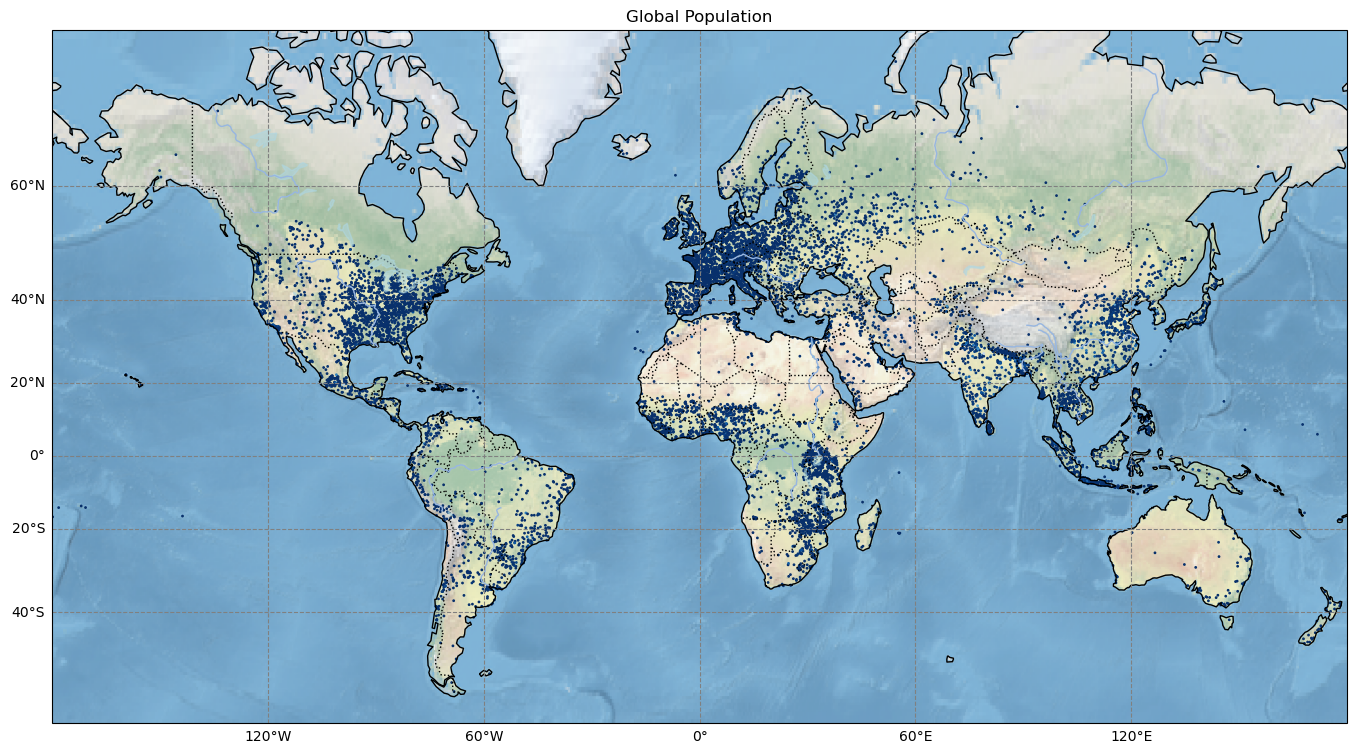

In [54]:
population_df_sample = population_df.sample(10000).fillna(0)

fig = plt.figure(figsize=(20,9))

_map = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())

_map.add_feature(cfeature.LAND, color='lightgray')
_map.add_feature(cfeature.OCEAN, color='lightblue')
_map.add_feature(cfeature.COASTLINE)
_map.add_feature(cfeature.BORDERS, linestyle=':')
_map.add_feature(cfeature.LAKES, alpha=0.5, color='lightblue')
_map.add_feature(cfeature.RIVERS)

_map.scatter(population_df_sample['LONG'],
             population_df_sample['LAT'],
             c=population_df_sample['population']/1000,
             s=1,
             cmap='Blues_r',
             transform=ccrs.PlateCarree())

gl = _map.gridlines(draw_labels=True,
                    dms=True,
                    x_inline=False,
                    y_inline=False,
                    color='gray',
                    linestyle='--')

_map.stock_img()

gl.top_labels = False

gl.right_labels = False

_map.set_title('Global Population')

plt.show()

<h3>AI Generated Code</h3>

In [ ]:
# =============================================================================
# Code generated by Artificial Intelligence (Google Gemini)
# Date: 2025-12-01
# Prompt: "Python function to map population of given latitude and longitude
#         using cartopy, shapely, and pyproj"
# Disclaimer: This code was reviewed and verified by a human developer. 
# It uses the WGS84 ellipsoid model for distance calculations via pyproj.
# =============================================================================

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 1. Create a figure and an axes object with the Pseudo-Mercator projection
fig = plt.figure(figsize=(10, 8))
# The map projection is Mercator (EPSG:3857 compatible)
_map = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())

# 2. Add geographical features
_map.add_feature(cfeature.LAND, color='lightgray')
_map.add_feature(cfeature.OCEAN, color='lightblue')
_map.add_feature(cfeature.COASTLINE)
_map.add_feature(cfeature.BORDERS, linestyle=':')
_map.add_feature(cfeature.LAKES, alpha=0.5, color='lightblue')
_map.add_feature(cfeature.RIVERS)

# Define the coordinates provided, which are already in Mercator X, Y meters
x_point = population_df['longitude'].iloc[997]
y_point = population_df['latitude'].iloc[997]

# 3. Plot the data point
# We must specify that the input data to plot() is in the map's projection system (ccrs.Mercator())
# because the X, Y values are large (millions of meters) not degrees (-180 to 180)
_map.plot(x_point, y_point, 'ro', markersize=8, transform=ccrs.Mercator(), label=f'Point ({x_point/1e6:.1f}M, {y_point/1e6:.1f}M)')

# 4. Set map extent
# Define a bounding box in standard degrees (PlateCarree) that surrounds the point
# The point is near Brazil/Atlantic.
# Extent format: [lon_min, lon_max, lat_min, lat_max] in degrees
# This range covers South America and the adjacent Atlantic Ocean
extent_lon_lat = [-90, -30, -60, 10]
_map.set_extent(extent_lon_lat, crs=ccrs.PlateCarree()) # Crucial: tell set_extent these values are degrees

# 5. Add gridlines and labels
# Gridlines should generally be drawn using a PlateCarree transform for lat/lon labels
gl = _map.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', linestyle='--')
gl.top_labels = False
gl.right_labels = False

# 6. Add title and legend
_map.set_title('Map in WGS 84 / Pseudo-Mercator (EPSG:3857)')
_map.legend()

# 7. Display the plot
plt.show()


In [ ]:
# =============================================================================
# Code generated by Artificial Intelligence (Google Gemini)
# Date: 2025-12-01
# Prompt: "Python function to determine whether or not a point is a river
#         using cartopy, shapely, and pyproj"
# Disclaimer: This code was reviewed and verified by a human developer. 
# It uses the WGS84 ellipsoid model for distance calculations via pyproj.
# =============================================================================

import cartopy.io.shapereader as shpreader
import shapely.geometry as sgeom
from shapely.ops import unary_union
from shapely.prepared import prep
import cartopy.crs as ccrs

def is_on_river(lon, lat, scale='50m', buffer_distance=0.01):
    """
    Checks if a given longitude and latitude point is on a river feature.

    Args:
        lon (float): Longitude of the point.
        lat (float): Latitude of the point.
        scale (str): The map scale resolution ('110m', '50m', or '10m').
        buffer_distance (float): A small buffer in degrees to account for line thickness 
                                 and approximate river width, as rivers are lines in the dataset.

    Returns:
        bool: True if the point is on a river, False otherwise.
    """
    # Define the point using shapely in WGS 84 (PlateCarree CRS)
    point = sgeom.Point(lon, lat)

    # Use NaturalEarthFeature to get the river centerline data
    # The 'rivers_lake_centerlines' feature is a LineString geometry.
    rivers_feature = shpreader.natural_earth(
        resolution=scale,
        category='physical',
        name='rivers_lake_centerlines'
    )
    
    # Read all river geometries
    river_geoms = list(shpreader.Reader(rivers_feature).geometries())
    
    # Combine all river lines into a single geometric collection for efficiency
    all_rivers = unary_union(river_geoms)
    
    # Apply a small buffer around the river lines (in degrees) to allow for "nearness"
    buffered_rivers = all_rivers.buffer(buffer_distance)
    
    # Prepare the geometry for faster point containment tests
    prepared_rivers = prep(buffered_rivers)
    
    # Perform the check
    return prepared_rivers.contains(point)

# --- Example Usage ---

# Example 1: Point on the Amazon River mouth in Brazil (approx)
lon_amazon = -49.25
lat_amazon = 0.5

# Example 2: Point in the middle of the Atlantic Ocean
lon_ocean = -30.0
lat_ocean = 0.0

print(f"Is ({lon_amazon}, {lat_amazon}) on a river? {is_on_river(lon_amazon, lat_amazon)}")
print(f"Is ({lon_ocean}, {lat_ocean}) on a river? {is_on_river(lon_ocean, lat_ocean)}")

# You can adjust the scale to '10m' for a higher resolution dataset if needed,
# though it will take slightly longer to process.


In [ ]:
# =============================================================================
# Code generated by Artificial Intelligence (Google Gemini)
# Date: 2025-12-01
# Prompt: "Python function to calculate the geodesic distance from a point 
#          to the nearest river using cartopy, shapely, and pyproj"
# 
# Disclaimer: This code was reviewed and verified by a human developer. 
# It uses the WGS84 ellipsoid model for distance calculations via pyproj.
# =============================================================================

import cartopy.io.shapereader as shpreader
from shapely.geometry import Point
from shapely.ops import unary_union, nearest_points
from pyproj import Geod
import numpy as np

def distance_to_nearest_river(lon, lat, scale='50m'):
    """
    Calculates the geodesic distance (in kilometers) from a point to the nearest river centerline.

    Args:
        lon (float): Longitude of the point.
        lat (float): Latitude of the point.
        scale (str): The map scale resolution ('110m', '50m', or '10m').

    Returns:
        float: The distance to the nearest river in kilometers (or None if no data found).
    """
    point = Point(lon, lat)

    # 1. Load the river features from Natural Earth data
    rivers_feature = shpreader.natural_earth(
        resolution=scale,
        category='physical',
        name='rivers_lake_centerlines'
    )
    
    # Read all river geometries
    try:
        river_geoms = list(shpreader.Reader(rivers_feature).geometries())
    except Exception as e:
        print(f"Error reading river data: {e}")
        return None

    if not river_geoms:
        return None

    # 2. Combine all river lines into a single MultiLineString for efficient processing
    all_rivers = unary_union(river_geoms)
    
    # 3. Find the nearest point on the river geometry to the input point
    nearest_pnt_on_river, _ = nearest_points(point, all_rivers)

    # 4. Calculate the geodesic distance between the input point and the nearest point on the river
    # Use pyproj.Geod for accurate distance calculation on the Earth's surface (WGS84 ellipsoid)
    geod = Geod(ellps='WGS84')
    
    # inv returns forward azimuth, back azimuth, and distance in meters
    az12, az21, distance_meters = geod.inv(
        lon, lat, 
        nearest_pnt_on_river.x, nearest_pnt_on_river.y
    )

    return distance_meters / 1000.0 # Return distance in kilometers

# --- Example Usage ---

# Point 1: Near the Amazon River mouth (should be close to 0 km)
lon_amazon = -49.25
lat_amazon = 0.5
distance_amazon = distance_to_nearest_river(lon_amazon, lat_amazon)
print(f"Distance to nearest river from ({lon_amazon}, {lat_amazon}): {distance_amazon:.2f} km")

# Point 2: Middle of the Atlantic Ocean (should be far)
lon_ocean = -30.0
lat_ocean = 0.0
distance_ocean = distance_to_nearest_river(lon_ocean, lat_ocean)
print(f"Distance to nearest river from ({lon_ocean}, {lat_ocean}): {distance_ocean:.2f} km")

# Point 3: A location in Florida, USA (current location context)
lon_fl = -81.5
lat_fl = 28.0
distance_fl = distance_to_nearest_river(lon_fl, lat_fl)
print(f"Distance to nearest river from ({lon_fl}, {lat_fl}): {distance_fl:.2f} km")


In [ ]:
# =============================================================================
# Code generated by Artificial Intelligence (Google Gemini)
# Date: 2025-12-01
# Prompt: "Python function to calculate distance to roads and bridges 
#         from latitude and longitude using osmnx."
# 
# Disclaimer: This code was reviewed and verified by a human developer. 
# It uses the WGS84 ellipsoid model for distance calculations via pyproj.
# =============================================================================

import osmnx as ox
# Make sure to import unary_union here:
from shapely.ops import unary_union, nearest_points 
from shapely.geometry import Point
from pyproj import Geod
import numpy as np

def distance_to_nearest_road_m(lon, lat, network_type='drive'):
    """
    Calculates the geodesic distance (in meters) from a point to the nearest road edge.
    """
    target_point = Point(lon, lat)
    
    # 1. Download a street network around the point's general area
    G = ox.graph_from_point((lat, lon), dist=1000, network_type=network_type, simplify=False)
    
    # Convert graph edges to a GeoDataFrame for easier spatial analysis with Shapely
    gdf_edges = ox.graph_to_gdfs(G, nodes=False, edges=True)
    
    # 2. Combine all road line segments into a single geometric collection
    # 'unary_union' is now defined and accessible
    all_roads = unary_union(gdf_edges['geometry'])

    # 3. Find the nearest point on the road geometry to the input point
    p_target, p_on_road = nearest_points(target_point, all_roads)

    # 4. Calculate the geodesic distance using pyproj
    geod = Geod(ellps='WGS84')
    
    az12, az21, distance_meters = geod.inv(
        p_target.x, p_target.y, 
        p_on_road.x, p_on_road.y
    )

    return distance_meters

# --- Example Usage ---

# Point 1: A general residential location in Florida
lon_point = -81.35
lat_point = 28.55
distance_to_road = distance_to_nearest_road_m(lon_point, lat_point)

print(f"Distance from ({lat_point}, {lon_point}) to nearest road: {distance_to_road:.2f} meters")

# Point 2: An off-road area (e.g., a park center) in Florida (approx)
lon_park = -81.45
lat_park = 28.6
distance_to_road_park = distance_to_nearest_road_m(lon_park, lat_park)

print(f"Distance from ({lat_park}, {lon_park}) to nearest road: {distance_to_road_park:.2f} meters")
